# The whole-body 3D reconstruction

This notebook demonstrates the process of whole-body 3D reconstruction based on 3D spatial transcriptome data. This is done in the following five steps.

1. Construct the original 3D point cloud model;
2. (Optionally) Trim the original 3D point cloud model;
3. Construct the surface mesh based on the 3D point cloud;
4. Construct the volume based on the surface mesh;
5. (Optionally) Add cells to the volume;
6. Save the models.

This example reconstructs 3D Drosophila embryos model based on 3D spatial transcriptome data of Drosophila embryos.


### Packages

In [1]:
import os
import anndata as ad
import spateo as st

/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:371: UserWarning: Trying to register the cmap 'fire' which already exists.
  plt.register_cmap("fire", fire_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:372: UserWarning: Trying to register the cmap 'darkblue' which already exists.
  plt.register_cmap("darkblue", darkblue_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:373: UserWarning: Trying to register the cmap 'darkgreen' which already exists.
  plt.register_cmap("darkgreen", darkgreen_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:374: UserWarning: Trying to register the cmap 'darkred' which already exists.
  plt.register_cmap("darkred", darkred_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:375: UserWarning: Trying to register the cmap 'darkpurple' whic

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Data source

In [2]:
cellbin_h5ad = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/5_annotation/E8-10_b_all_anno_scsq.h5ad"
cellbin_adata = ad.read_h5ad(cellbin_h5ad)
print(cellbin_adata)
########################################################################################################################
save_folder = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction"
save_cellbin_tdr_folder = os.path.join(save_folder, r"E8-10_b_all_anno_scsq")
save_cellbin_tdr_1_folder = os.path.join(save_cellbin_tdr_folder, r"1_reconstruct_whole_body")
save_cellbin_tdr_mesh_folder = os.path.join(save_cellbin_tdr_1_folder, r"mesh")
save_cellbin_tdr_image_folder = os.path.join(save_cellbin_tdr_1_folder, r"image")
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
if not os.path.exists(save_cellbin_tdr_folder):
    os.mkdir(save_cellbin_tdr_folder)
if not os.path.exists(save_cellbin_tdr_1_folder):
    os.mkdir(save_cellbin_tdr_1_folder)
if not os.path.exists(save_cellbin_tdr_mesh_folder):
    os.mkdir(save_cellbin_tdr_mesh_folder)
if not os.path.exists(save_cellbin_tdr_image_folder):
    os.mkdir(save_cellbin_tdr_image_folder)

AnnData object with n_obs × n_vars = 12555 × 8905
    obs: 'area', 'slices', 'x', 'y', 'tissues', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cellbin_tissues', 'z'
    var: 'n_cells-E8-10_b_S06', 'mt-E8-10_b_S06', 'n_cells_by_counts-E8-10_b_S06', 'mean_counts-E8-10_b_S06', 'pct_dropout_by_counts-E8-10_b_S06', 'total_counts-E8-10_b_S06', 'n_cells-E8-10_b_S07', 'mt-E8-10_b_S07', 'n_cells_by_counts-E8-10_b_S07', 'mean_counts-E8-10_b_S07', 'pct_dropout_by_counts-E8-10_b_S07', 'total_counts-E8-10_b_S07', 'n_cells-E8-10_b_S08', 'mt-E8-10_b_S08', 'n_cells_by_counts-E8-10_b_S08', 'mean_counts-E8-10_b_S08', 'pct_dropout_by_counts-E8-10_b_S08', 'total_counts-E8-10_b_S08', 'n_cells-E8-10_b_S09', 'mt-E8-10_b_S09', 'n_cells_by_counts-E8-10_b_S09', 'mean_counts-E8-10_b_S09', 'pct_dropout_by_counts-E8-10_b_S09', 'total_counts-E8-10_b_S09', 'n_cells-E8-10_b_S10', 'mt-E8-10_b_S10', 'n_cells_by_counts-E8-10_b_S10', 'mean_counts-E8-10_b_S10', 'pct_dropou

### Construct the original 3D point cloud model

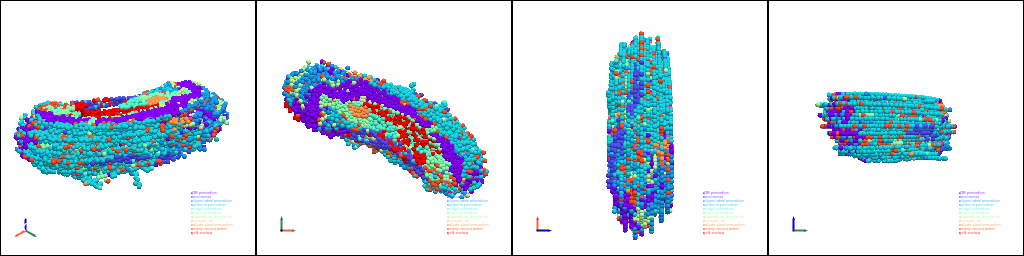

In [3]:
# Reconstruction
raw_pc = st.tdr.construct_pc(adata=cellbin_adata, groupby="cellbin_tissues", key_added="groups",
                        spatial_key="tdr_spatial", colormap="rainbow")

# Add labels
st.tdr.add_mesh_labels(mesh=raw_pc, key_added="area", labels=cellbin_adata.obs["area"].values, where="point_data", colormap="hot_r")

# Visualization
"""
for cpo in ["iso", "xy", "zx", "yz"]:
    # You can use a one-step function
    # st.pl.three_d_plot(mesh=raw_pc, key="groups", opacity=1.0, mesh_style="points", point_size=10, jupyter=True, initial_cpo=cpo)

    # If you want to open in the visualization window and save the result, please set `jupyter=False`.
    #st.pl.three_d_plot(mesh=raw_pc, key="groups", opacity=1.0, mesh_style="points", point_size=10, jupyter=False, initial_cpo=cpo,
    #                   filename=os.path.join(save_cellbin_tdr_image_folder, f"raw_pc_{cpo}.tif"))

    # You can also use our wrapper function
    p = st.pl.create_plotter(jupyter=True, background="white")
    st.pl.add_mesh(plotter=p, mesh=raw_pc, key="groups", point_size=10.0, mesh_style="points")
    st.pl.add_legend(plotter=p, mesh=raw_pc, key="groups", legend_loc="lower left")
    p.show(cpos=cpo)
"""
def visualization(jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=raw_pc, key="groups", point_size=5.0, mesh_style="points")
        st.pl.add_legend(plotter=p, mesh=raw_pc, key="groups", legend_loc="lower right")
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

# Also, you can choose to plot all results on the same graph
visualization(jupyter=True)
# How to save an image
visualization(jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, "raw_pc_model.tiff"))



### (Optionally) Trim the original 3D point cloud model

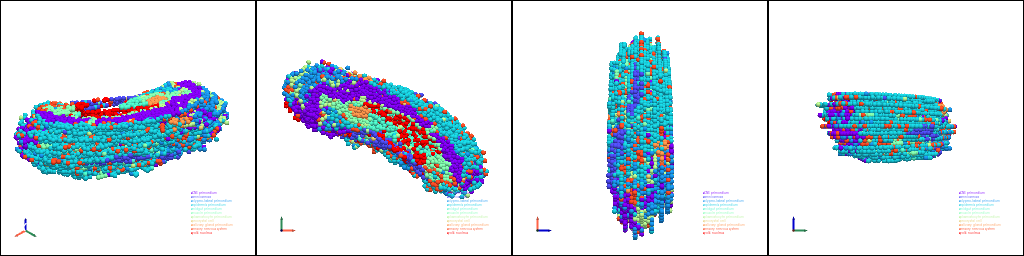

In [5]:
# Trim
trim_pc_block = st.tdr.interactive_rectangle_clip(mesh=raw_pc, invert=True)
trim_pc = [i for i in trim_pc_block][0]

# Visualization
def visualization(jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=trim_pc, key="groups", point_size=5.0, mesh_style="points")
        st.pl.add_legend(plotter=p, mesh=trim_pc, key="groups", legend_loc="lower right")
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

# Also, you can choose to plot all results on the same graph
visualization(jupyter=True)
# How to save an image
visualization(jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, "trim_pc_model.tiff"))


### Construct the surface mesh based on the 3D point cloud

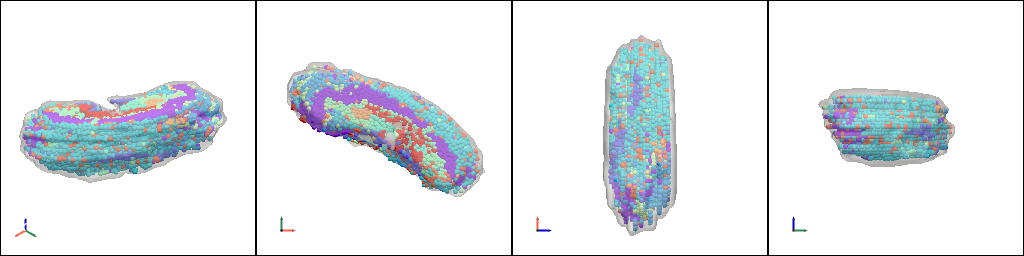

In [36]:
# Reconstruction
surf, pc = st.tdr.construct_surface(pc=trim_pc, key_added="groups", cs_method="marching_cube",
                                   smooth=1000, alpha=0.5, uniform_pc=True, uniform_pc_alpha=55, scale_factor=[1.05, 1.05, 1.1])

# Visualization
def visualization(jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=pc, key="groups", point_size=5.0, mesh_style="points")
        st.pl.add_mesh(plotter=p, mesh=surf, key="groups", mesh_style="surface")
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

# Also, you can choose to plot all results on the same graph
visualization(jupyter=True)
# How to save an image
visualization(jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, "surface_model.tiff"))

### Construct the volume based on the surface mesh

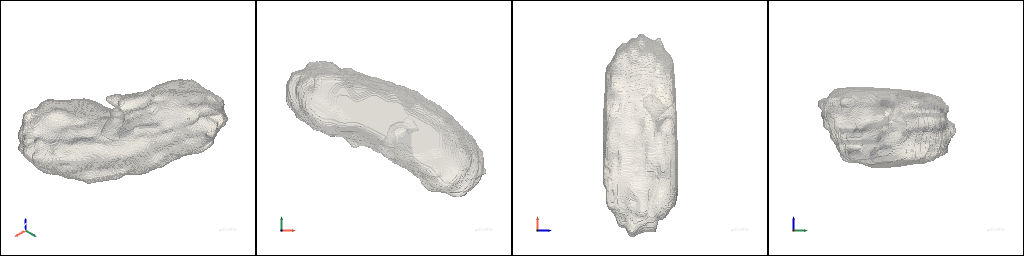

In [37]:
# Reconstruction
volume = st.tdr.construct_volume(surf=surf, key_added="groups", volume_smoothness=300)

# Visualization
def visualization(jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=volume, key="groups")
        st.pl.add_legend(plotter=p, mesh=volume, key="groups")
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

# Also, you can choose to plot all results on the same graph
visualization(jupyter=True)
# How to save an image
visualization(jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, "volume_model.tiff"))


### (Optionally) Add cells to the volume

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    groups                  <U25     (393294,)
    groups_rgba             float64  (393294, 4)
    obs_index               <U15     (393294,)
['epidermis primordium' 'epidermis primordium' 'CNS primordium' ...
 'volume' 'volume' 'volume']
['1-E8-10_b_S06' '2-E8-10_b_S06' '3-E8-10_b_S06' ... 'no_cell' 'no_cell'
 'no_cell']


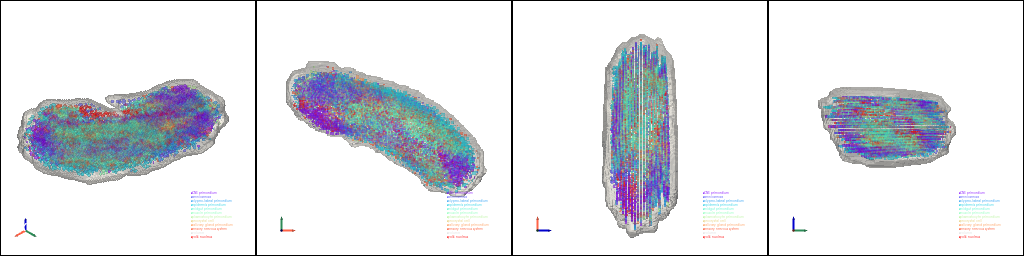

In [38]:
import numpy as np

# Reconstruct voxelized point cloud
cell_size = pow(np.asarray(pc.point_data["area"]), 1/2).reshape(pc.n_points, 1) / 1.5
z_size = np.asarray([14] * pc.n_points).reshape(pc.n_points, 1) / 1.5
voxel_size = np.concatenate([cell_size, cell_size, z_size], axis=1)
voxel_pc = st.tdr.voxelize_pc(pc=pc, voxel_size=voxel_size)

# Rconstruction
cells_volume = st.tdr.construct_volume(surf=surf, voxel_pc=voxel_pc, key_added="groups", volume_smoothness=200)
print(cells_volume.cell_data)
print(cells_volume.cell_data["groups"])
print(cells_volume.cell_data["obs_index"])

# Visualization
def visualization(jupyter=False, save_image=None):
    p = st.pl.create_plotter(jupyter=jupyter, background="white", shape=(1, 4), window_size=(1024, 256))
    for i, cpo in enumerate(["iso", "xy", "zx", "yz"]):
        p.subplot(0, i)
        st.pl.add_mesh(plotter=p, mesh=cells_volume, key="groups")
        st.pl.add_legend(plotter=p, mesh=cells_volume, key="groups")
        p.add_axes()
        p.camera_position = cpo
    st.pl.output_plotter(p=p, filename=save_image, jupyter=jupyter)

# Also, you can choose to plot all results on the same graph
visualization(jupyter=True)
# How to save an image
visualization(jupyter=False, save_image=os.path.join(save_cellbin_tdr_image_folder, "cells_model.tiff"))

### Save the models

In [39]:
# save models as a vtk file
st.tdr.save_mesh(mesh=pc, filename=os.path.join(save_cellbin_tdr_mesh_folder, "trim_pc_model.vtk"))
st.tdr.save_mesh(mesh=surf, filename=os.path.join(save_cellbin_tdr_mesh_folder, "surface_model.vtk"))
st.tdr.save_mesh(mesh=volume, filename=os.path.join(save_cellbin_tdr_mesh_folder, "volume_model.vtk"))
st.tdr.save_mesh(mesh=cells_volume, filename=os.path.join(save_cellbin_tdr_mesh_folder, "cells_model.vtk"))